In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## On minimise une fonction, connue analytiquement
def J(theta):
    return np.sin((theta+1)**2)-theta/10+theta**4/30

$$J(\theta) = \sin\Big((\theta+1)^2\Big) - \frac{\theta}{10} + \frac{\theta^4}{30}$$

Text(0, 0.5, '$J$')

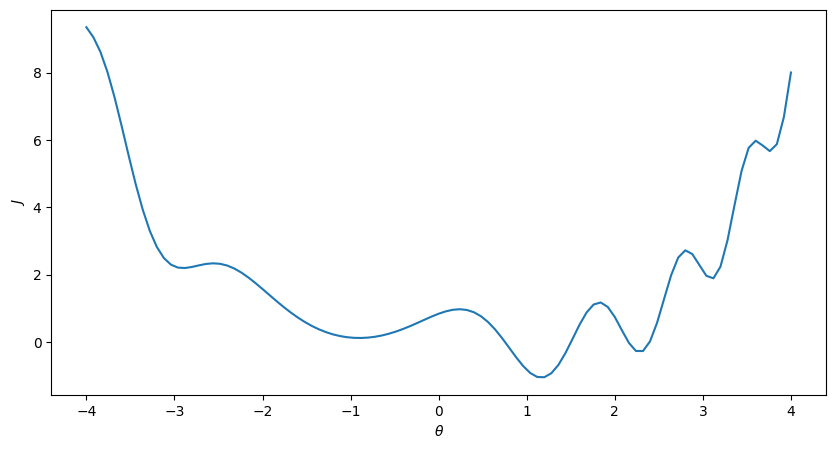

In [3]:
xs= np.linspace(-4,4, 101)
ys = J(xs) 

plt.figure(1,[10,5])
plt.plot(xs,ys)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J$")

# Descente de gradient

Implémentez la descente de gradient pour cette fonction. Observez le résultat pour différentsz choix de taux d'apprentissage $\eta$ (`eta`) et différentes positions initiales $\Theta_0$.


Vous pouvez vous référer à ce qui a été vu en `Descente de Gradient - topo.ipynb` pour trouver les étapes. Les grande étapes sont:
- calculez le gradient (la dérivée, ici, car 1 seule variable) de J
- écrivez le code pour la descente de gradient

Remarque: si vous avez des difficultés avec les dérivées mais que vous êtes bon en code, vous pouvez aussi tenter de calculer une dérivée approximative en évaluant `J` en de très nombreux points, et en prenant la pente locale comme une approximation de la dérivée. Votre code sera cependant plus compliqué, moins précis, et en plus, ce n'est typiquement *pas* la stratégie adoptée en Machine Learning (mais bon, c'est une technique de programmation scientifique qui peut être utile ailleurs).

In [9]:
# il faut calculer à la main la dérivée de J, et la taper ici:
def gradientDeJ(theta):
    return 2*(theta + 1)*np.cos((theta + 1)**2) + 4*theta/30 - 1/10

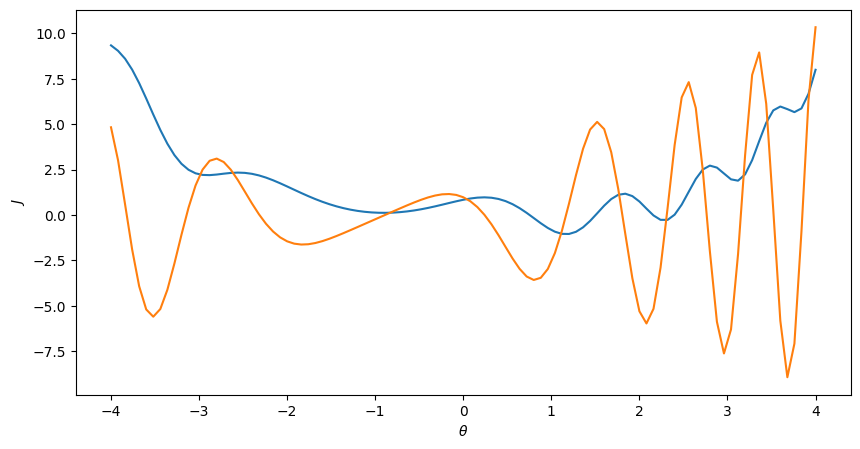

In [10]:
plt.figure(1,[10,5])
plt.plot(xs,ys)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J$")

yss = gradientDeJ(xs)
plt.plot(xs,yss)


In [23]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0
    
    plt.plot(xs, J(xs), label = "J(Theta)")
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$J(\theta)$")
    plt.scatter([theta0], [J(theta)],color='black')
    
    for epoch in range(epochMax):
        moinsDerivee = - eta*gradientDeJ(theta)
        plt.arrow(theta, J(theta), moinsDerivee, 0, width = 0.25,length_includes_head=True)
        theta+= moinsDerivee
        
    return theta
    

-0.8907468480985186

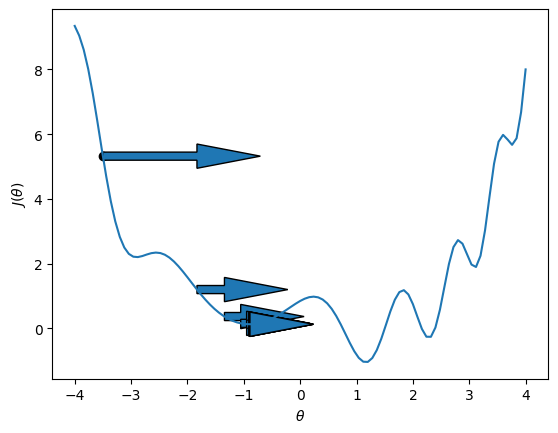

In [24]:
theta0 = -3.5
eta = 0.3
epochMax=10
descente_de_gradient_avec_plot(theta0, eta, epochMax)

Bonus: si vous avez terminé la descente de gradient, que vous convergez vers un minimum local (en faisant varier `eta`, le nombre d'itérations et la valeur initiale de `theta`), ajoutez à votre code le suivi des valeurs de $J(\theta)$ au cours des itérations. Concrètement, si on note $\theta^{(i)}$ la $i$-ème itération (époque) de votre algorithme de descente de gradient, il faut tracer $J(\theta^{(i)})$ en fonction de $i$. 

Ce genre de suivi peut toujours etre fait, même pour un problème de grande dimension (c.a.d. quand $\theta \in \mathbb{R}^D$ avec $D$ grand), car $J(\theta) \in \mathbb{R}$ peut être affiché, contrairement à $\theta \in \mathbb{R}^D$) et permet d'affiner le choix de `eta`: selon que la courbe remonte ou descend trop lentement, on peut ajuster. 


